In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [2]:
#Features:
#CRIM: Per capita crime rate by town
#ZN: Proportion of residential land zoned for lots over 25, 000 sq. ft
#INDUS: Proportion of non-retail business acres per town
#CHAS: Charles River dummy variable(=1 if tract bounds river 0 otherwise)
#NOX: Nitric oxide concentration(parts per 10 million)
#RM: Average number of rooms per dwelling
#AGE: Proportion of owner-occupied units built prior to 1940
#DIS: Weighted distances to five Boston employment centers
#RAD: Index of accessibility to radial highways
#TAX: Full-value property tax rate per $10, 000
#PTRATIO: Pupil-teacher ratio by town
#B: 1000(Bk — 0.63)², where Bk is the proportion of[people of African American descent] by town
#LSTAT: Percentage of lower status of the population
#Target:
#MEDV: Median value of owner-occupied homes in $1000s


In [3]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
df = pd.DataFrame(data=boston_dataset.data,
                     columns=boston_dataset.feature_names)
df['MEDV'] = boston_dataset.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006,18.000,2.310,0.000,0.538,6.575,65.200,4.090,1.000,296.000,15.300,396.900,4.980,24.000
1,0.027,0.000,7.070,0.000,0.469,6.421,78.900,4.967,2.000,242.000,17.800,396.900,9.140,21.600
2,0.027,0.000,7.070,0.000,0.469,7.185,61.100,4.967,2.000,242.000,17.800,392.830,4.030,34.700
3,0.032,0.000,2.180,0.000,0.458,6.998,45.800,6.062,3.000,222.000,18.700,394.630,2.940,33.400
4,0.069,0.000,2.180,0.000,0.458,7.147,54.200,6.062,3.000,222.000,18.700,396.900,5.330,36.200


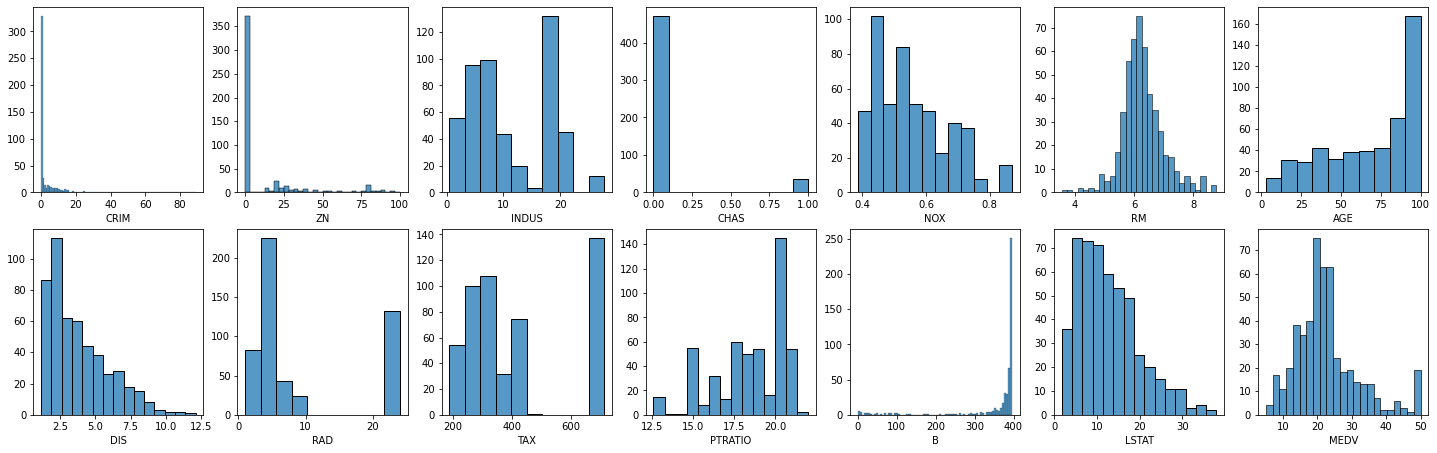

In [4]:
n_rows = 2
n_cols = 7
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(25,7.5))
for i, column in enumerate(df.columns):
    sns.histplot(df[column], ax=axes[i//n_cols, i % n_cols]).set(ylabel=None)
    
  

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
y = df['MEDV']
X = df.drop(columns='MEDV')
# Add in bad variables
X['random_variable_1'] = np.random.randint(1, 6, X.shape[0])
X['random_variable_2'] = np.random.randint(100, 150, X.shape[0])
X['random_variable_3'] = np.random.randint(0, 2, X.shape[0])
# Add in identical variables for multicollinearity
X['identical_variable_1'] = X['PTRATIO'] * 10.5
X['identical_variable_2'] = X['TAX'] * 1.2
X['identical_variable_3'] = X['RM'] * 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(339, 19) (167, 19) (339,) (167,)


In [6]:
# Stats Models first, no intercept added
from statsmodels.api import OLS
model = OLS(y_train, X_train).fit()

y_pred_testing = model.predict(X_test)
y_pred_training = model.predict(X_train)
coefficients = model.params
train_r_squared = format(r2_score(y_train, y_pred_training), '.4f')
test_r_squared = format(r2_score(y_test, y_pred_testing), '.4f')
train_mse = format(mean_squared_error(y_train, y_pred_training), '.4f')
test_mse = format(mean_squared_error(y_test, y_pred_testing), '.4f')


print(f"Model: Statsmodels OLS")
print(f"MSE: {test_mse}")
print(f"R2: {test_r_squared}")
print(f"Coefficients:")
print(coefficients)




Model: Statsmodels OLS
MSE: 23.3739
R2: 0.6911
Coefficients:
CRIM                   -0.115
ZN                      0.041
INDUS                   0.050
CHAS                    3.153
NOX                    -2.717
RM                      0.014
AGE                    -0.015
DIS                    -0.943
RAD                     0.112
TAX                    -0.002
PTRATIO                -0.004
B                       0.016
LSTAT                  -0.473
random_variable_1       0.028
random_variable_2       0.010
random_variable_3      -0.103
identical_variable_1   -0.041
identical_variable_2   -0.003
identical_variable_3    0.284
dtype: float64


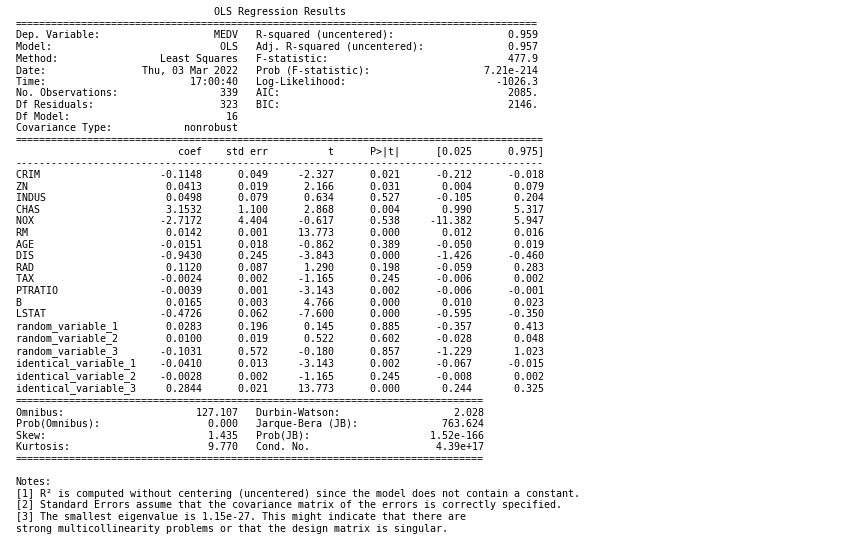

In [7]:
def create_statsmodel_output(reg_summary):
  plt.rc('figure', figsize=(12, 7))
  plt.text(0.01, 0.05, str(reg_summary), {
          'fontsize': 10}, fontproperties='monospace')
  plt.axis('off')
  plt.tight_layout()
create_statsmodel_output(model.summary())


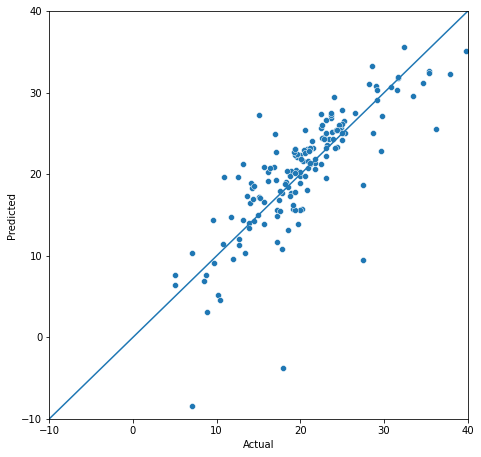

In [8]:
def plot_actual_vs_predicted(y_actual, y_pred):
  highest_value = min(np.amax(y_actual), np.amax(y_pred))
  lowest_value = min(np.amin(y_actual), np.amin(y_pred))
  highest_value_rounded = round(highest_value/10)*10
  lowest_value_rounded = round(lowest_value/10)*10
  plt.subplots(figsize=(7.5, 7.5))
  plt.xlim(lowest_value_rounded, highest_value_rounded)
  plt.ylim(lowest_value_rounded, highest_value_rounded)
  plt.xlabel('Actual', fontsize=10)
  plt.ylabel('Predicted', fontsize=10)
  # Straight line
  line = [lowest_value_rounded, highest_value_rounded]
  sns.scatterplot(x=y_actual, y=y_pred) 
  sns.lineplot(x=line, y=line)


plot_actual_vs_predicted(y_test, y_pred_testing)


Model: LinearRegression
MSE: 20.9926
R2: 0.7226
Coefficients:
Intercept: 37.6490
CRIM: -0.12
ZN: 0.03
INDUS: 0.05
CHAS: 3.27
NOX: -16.77
RM: 0.01
AGE: -0.01
DIS: -1.42
RAD: 0.22
TAX: -0.00
PTRATIO: -0.01
B: 0.01
LSTAT: -0.54
random_variable_1: -0.08
random_variable_2: -0.03
random_variable_3: -0.12
identical_variable_1: -0.09
identical_variable_2: -0.00
identical_variable_3: 0.19


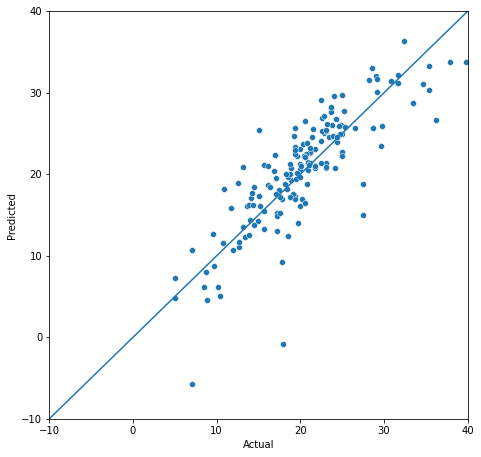

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

# Train the model using the training sets
model.fit(X_train, y_train)

y_pred_testing = model.predict(X_test)
y_pred_training = model.predict(X_train)
model_name =  type(model).__name__
intercept = format(model.intercept_, '.4f')
coefficients = ['%.2f'% elem for elem in model.coef_]
train_r_squared = format(r2_score(y_train, y_pred_training), '.4f')
test_r_squared = format(r2_score(y_test, y_pred_testing), '.4f')
train_mse = format(mean_squared_error(y_train, y_pred_training), '.4f')
test_mse = format(mean_squared_error(y_test, y_pred_testing), '.4f')


plot_actual_vs_predicted(y_test, y_pred_testing)
print(f"Model: {model_name}")
print(f"MSE: {test_mse}")
print(f"R2: {test_r_squared}")
print(f"Coefficients:")
print(f"Intercept: {intercept}")
for x, y in zip(X_train.columns, coefficients):
  print(f"{x}: {y}")


C:\Users\Michael.CamdenSmith\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='MEDV'>

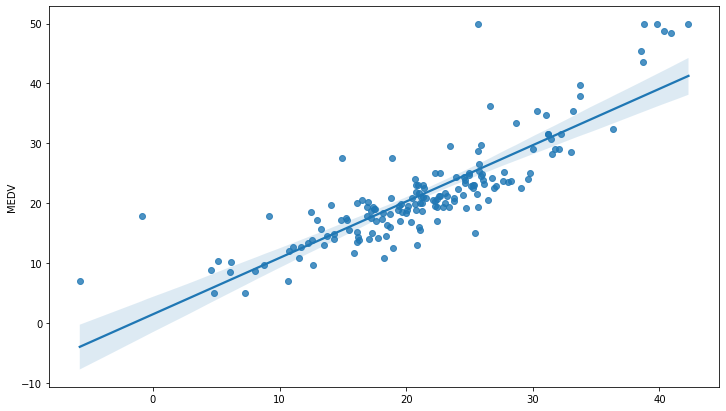

In [10]:
sns.regplot(y_pred_testing, y_test)


In [11]:
df_test = pd.DataFrame({'actual': y_test, 'predicted': y_pred_testing,
                       'error': y_test - y_pred_testing, 'square_error': np.power(y_pred_testing - y_test,2)})
df_test

,actual,predicted,error,square_error
173,23.600,28.047,-4.447,19.780
274,32.400,36.341,-3.941,15.529
491,13.600,16.090,-2.490,6.201
72,22.800,25.104,-2.304,5.309
452,16.100,18.703,-2.603,6.777
...,...,...,...,...
110,21.700,20.996,0.704,0.496
321,23.100,25.361,-2.261,5.110
265,22.800,27.109,-4.309,18.568
29,21.000,21.152,-0.152,0.023


In [12]:
# MSE Calculation Check
df_test['square_error'].sum()/len(df_test.index)

20.992583515062353

In [13]:
# R2 Calculation Check
rss = df_test['square_error'].sum()
mean = df_test['actual'].mean()
tss = np.power(df_test['actual'] - mean,2).sum()
1 - rss/tss


0.7226083868918178

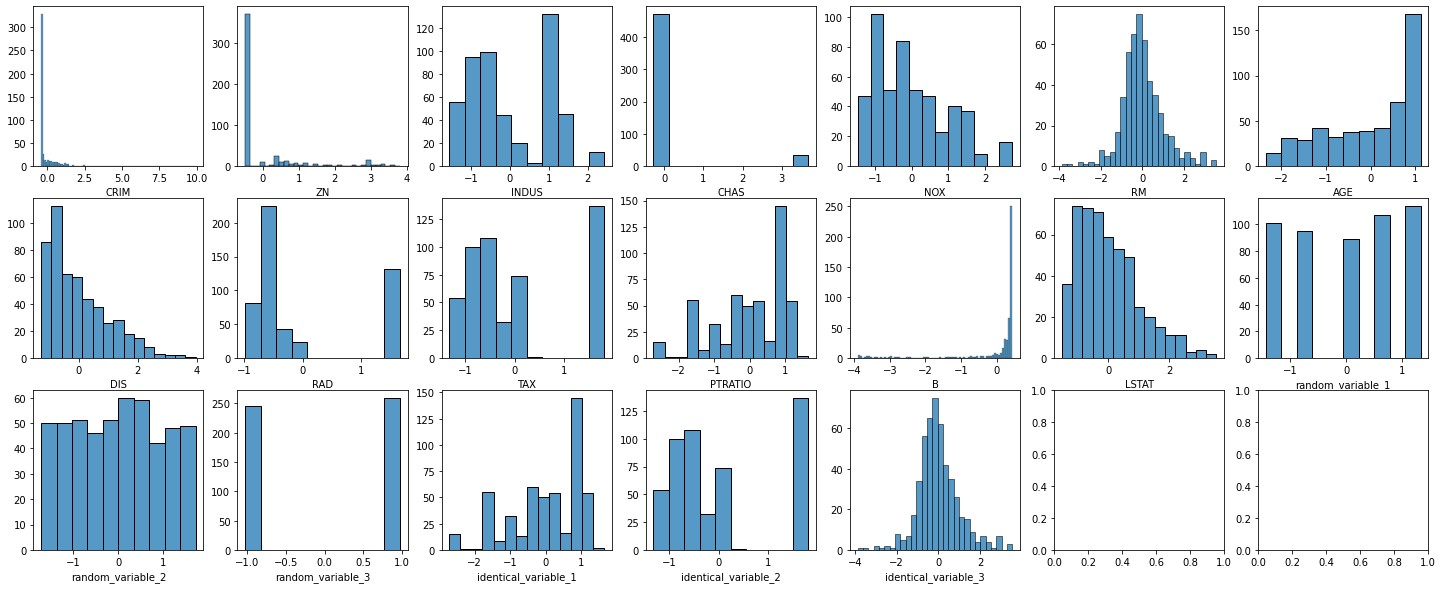

In [14]:
# Note on scaling!
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(data=X_scaled, columns=X.columns)
n_rows = 3
n_cols = 7
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(25, 10))
for i, column in enumerate(X_scaled.columns):
    sns.histplot(X_scaled[column], ax=axes[i//n_cols, i %
                 n_cols]).set(ylabel=None)


Model: Pipeline
MSE: 21.0057
R2: 0.7224
Coefficients:
Intercept: 22.9708
CRIM: -0.90
ZN: 0.77
INDUS: 0.34
CHAS: 0.87
NOX: -1.95
RM: 1.41
AGE: -0.39
DIS: -3.01
RAD: 1.84
TAX: -0.59
PTRATIO: -1.04
B: 1.06
LSTAT: -3.89
random_variable_1: -0.12
random_variable_2: -0.43
random_variable_3: -0.06
identical_variable_1: -1.04
identical_variable_2: -0.59
identical_variable_3: 1.41


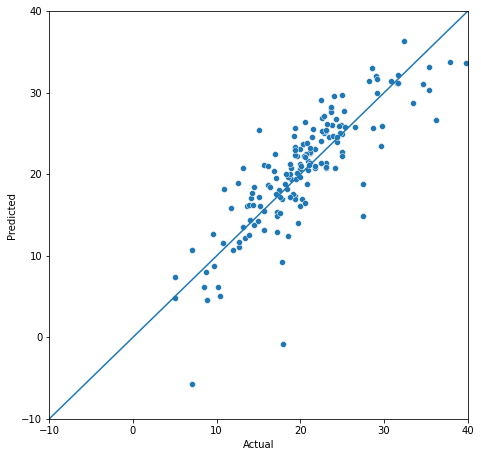

In [15]:
# Ridge Model
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
from numpy import arange

# # define model evaluation method
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
model = Ridge(alpha=0.5)

model = Pipeline(
  [('scaler', StandardScaler()),
   ('model', model)]
)

# Train the model using the training sets
model.fit(X_train, y_train)

y_pred_testing = model.predict(X_test)
y_pred_training = model.predict(X_train)
model_name = type(model).__name__
intercept = format(model['model'].intercept_, '.4f')
coefficients = ['%.2f' % elem for elem in model['model'].coef_]
train_r_squared = format(r2_score(y_train, y_pred_training), '.4f')
test_r_squared = format(r2_score(y_test, y_pred_testing), '.4f')
train_mse = format(mean_squared_error(y_train, y_pred_training), '.4f')
test_mse = format(mean_squared_error(y_test, y_pred_testing), '.4f')


plot_actual_vs_predicted(y_test, y_pred_testing)
print(f"Model: {model_name}")
print(f"MSE: {test_mse}")
print(f"R2: {test_r_squared}")
print(f"Coefficients:")
print(f"Intercept: {intercept}")
for x, y in zip(X_train.columns, coefficients):
  print(f"{x}: {y}")


Model: Pipeline
MSE: 24.6364
R2: 0.6745
Coefficients:
Intercept: 22.9708
CRIM: -0.16
ZN: 0.00
INDUS: -0.00
CHAS: 0.64
NOX: -0.00
RM: 2.87
AGE: -0.00
DIS: -0.24
RAD: -0.00
TAX: -0.00
PTRATIO: -1.49
B: 0.66
LSTAT: -3.96
random_variable_1: -0.00
random_variable_2: -0.01
random_variable_3: -0.00
identical_variable_1: -0.00
identical_variable_2: -0.00
identical_variable_3: 0.00


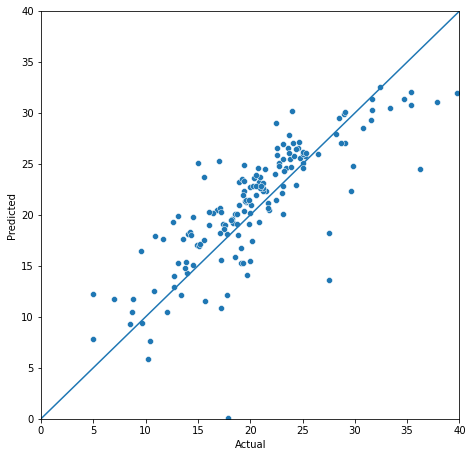

In [16]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import RepeatedKFold
from numpy import arange

# define model evaluation method
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
model = Lasso(alpha=0.5)

model = Pipeline(
    [('scaler', StandardScaler()),
     ('model', model)]
)

# Train the model using the training sets
model.fit(X_train, y_train)

y_pred_testing = model.predict(X_test)
y_pred_training = model.predict(X_train)
model_name = type(model).__name__
intercept = format(model['model'].intercept_, '.4f')
coefficients = ['%.2f' % elem for elem in model['model'].coef_]
train_r_squared = format(r2_score(y_train, y_pred_training), '.4f')
test_r_squared = format(r2_score(y_test, y_pred_testing), '.4f')
train_mse = format(mean_squared_error(y_train, y_pred_training), '.4f')
test_mse = format(mean_squared_error(y_test, y_pred_testing), '.4f')


plot_actual_vs_predicted(y_test, y_pred_testing)
print(f"Model: {model_name}")
print(f"MSE: {test_mse}")
print(f"R2: {test_r_squared}")
print(f"Coefficients:")
print(f"Intercept: {intercept}")
for x, y in zip(X_train.columns, coefficients):
  print(f"{x}: {y}")


Model: Pipeline
MSE: 22.8584
R2: 0.6980
Coefficients:
Intercept: -382040464.5331
CRIM: 382040243.88
ZN: 2.80
INDUS: 1.00
CHAS: -4.17
NOX: 14137.05
RM: 244.85
AGE: 49289.32
DIS: 1.06
RAD: -0.01
TAX: 1.49
PTRATIO: -20780.86
B: 36475.65
LSTAT: 0.18
random_variable_1: -2.06
random_variable_2: 1.91
random_variable_3: 0.43
identical_variable_1: 4674.51
identical_variable_2: -3473.16
identical_variable_3: 17317.48


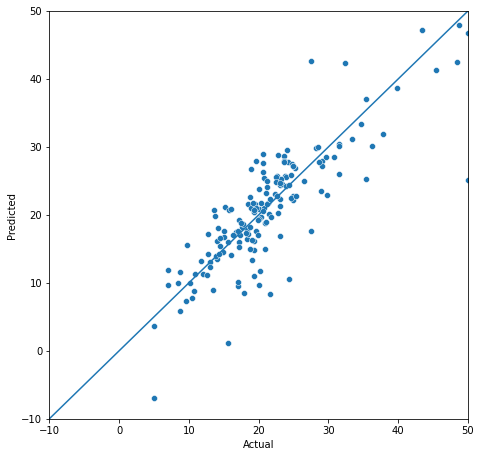

In [17]:
# Polynomial features
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import RepeatedKFold
from numpy import arange

model = LinearRegression()

model = Pipeline(
    [('scaler', PolynomialFeatures(2)),
     ('model', model)]
)

# Train the model using the training sets
model.fit(X_train, y_train)
y_pred_testing = model.predict(X_test)
y_pred_training = model.predict(X_train)
model_name = type(model).__name__
intercept = format(model['model'].intercept_, '.4f')
coefficients = ['%.2f' % elem for elem in model['model'].coef_]
train_r_squared = format(r2_score(y_train, y_pred_training), '.4f')
test_r_squared = format(r2_score(y_test, y_pred_testing), '.4f')
train_mse = format(mean_squared_error(y_train, y_pred_training), '.4f')
test_mse = format(mean_squared_error(y_test, y_pred_testing), '.4f')


plot_actual_vs_predicted(y_test, y_pred_testing)
print(f"Model: {model_name}")
print(f"MSE: {test_mse}")
print(f"R2: {test_r_squared}")
print(f"Coefficients:")
print(f"Intercept: {intercept}")
for x, y in zip(X_train.columns, coefficients):
  print(f"{x}: {y}")


In [18]:
#
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,random_variable_1,random_variable_2,random_variable_3,identical_variable_1,identical_variable_2,identical_variable_3
478,10.233,0.000,18.100,0.000,0.614,6.185,96.700,2.171,24.000,666.000,20.200,379.700,18.030,2,103,1,212.100,799.200,123.700
26,0.672,0.000,8.140,0.000,0.538,5.813,90.300,4.682,4.000,307.000,21.000,376.880,14.810,1,132,1,220.500,368.400,116.260
7,0.145,12.500,7.870,0.000,0.524,6.172,96.100,5.950,5.000,311.000,15.200,396.900,19.150,4,129,0,159.600,373.200,123.440
492,0.111,0.000,27.740,0.000,0.609,5.983,83.500,2.110,4.000,711.000,20.100,396.900,13.350,5,123,0,211.050,853.200,119.660
108,0.128,0.000,8.560,0.000,0.520,6.474,97.100,2.433,5.000,384.000,20.900,395.240,12.270,2,134,1,219.450,460.800,129.480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.171,0.000,8.560,0.000,0.520,5.836,91.900,2.211,5.000,384.000,20.900,395.670,18.660,3,112,0,219.450,460.800,116.720
270,0.299,20.000,6.960,0.000,0.464,5.856,42.100,4.429,3.000,223.000,18.600,388.650,13.000,5,141,0,195.300,267.600,117.120
348,0.015,80.000,2.010,0.000,0.435,6.635,29.700,8.344,4.000,280.000,17.000,390.940,5.990,1,109,0,178.500,336.000,132.700
435,11.160,0.000,18.100,0.000,0.740,6.629,94.600,2.125,24.000,666.000,20.200,109.850,23.270,5,148,0,212.100,799.200,132.580


In [19]:
with_polynomials = PolynomialFeatures(2).fit_transform(X_train)
X_train.shape, with_polynomials.shape


((339, 19), (339, 210))

Model: Pipeline
MSE: 23.9520
R2: 0.6835
Coefficients:
Intercept: 22.9708
CRIM: -0.41
ZN: 0.00
INDUS: -0.00
CHAS: 0.77
NOX: -0.51
RM: 1.56
AGE: -0.10
DIS: -0.56
RAD: -0.00
TAX: -0.06
PTRATIO: -0.82
B: 0.77
LSTAT: -2.86
random_variable_1: -0.00
random_variable_2: -0.22
random_variable_3: -0.00
identical_variable_1: -0.82
identical_variable_2: -0.05
identical_variable_3: 1.56


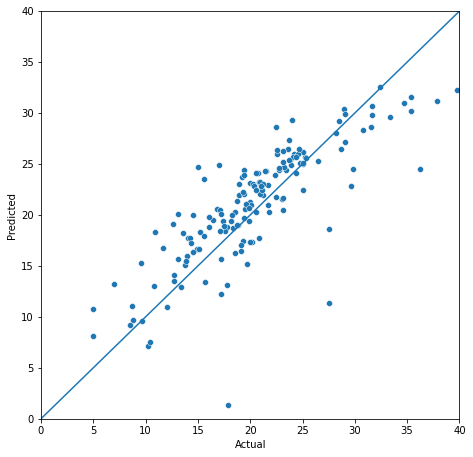

In [20]:
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import RepeatedKFold
from numpy import arange

# define model evaluation method
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
model = ElasticNet(alpha=0.5)

model = Pipeline(
    [('scaler', StandardScaler()),
     ('model', model)]
)

# Train the model using the training sets
model.fit(X_train, y_train)
y_pred_testing = model.predict(X_test)
y_pred_training = model.predict(X_train)
model_name = type(model).__name__
intercept = format(model['model'].intercept_, '.4f')
coefficients = ['%.2f' % elem for elem in model['model'].coef_]
train_r_squared = format(r2_score(y_train, y_pred_training), '.4f')
test_r_squared = format(r2_score(y_test, y_pred_testing), '.4f')
train_mse = format(mean_squared_error(y_train, y_pred_training), '.4f')
test_mse = format(mean_squared_error(y_test, y_pred_testing), '.4f')


plot_actual_vs_predicted(y_test, y_pred_testing)
print(f"Model: {model_name}")
print(f"MSE: {test_mse}")
print(f"R2: {test_r_squared}")
print(f"Coefficients:")
print(f"Intercept: {intercept}")
for x, y in zip(X_train.columns, coefficients):
  print(f"{x}: {y}")
